# Part II - (Factors Affecting Number and Duration of Rides)
## by (Antwi Bright Owusu)

## Investigation Overview

>In this presentation, we will look at the changes in the number of rides during the days of the week and the changes in the number of rides during the hours of the day. We will also look at the average ride time for user types and the gender of members respectively. 


## Dataset Overview

> The dataset consists of 183412 records and 16 fields. I added two new fields ie. the hour of ride and the day of ride fields to help in my analysis. This moved the number of fields from 16 to 18.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike_df = pd.read_csv('bike.csv')

In [3]:
# Make a copy of the dataset before  cleaning
bike_df_clean = bike_df.copy()

In [4]:
# convert start_time to date time
bike_df_clean['start_time']=pd.to_datetime(bike_df_clean['start_time'])
# convert end_time to date time
bike_df_clean['end_time']=pd.to_datetime(bike_df_clean['end_time'])

In [5]:
# get the hour each bike was hired
bike_df_clean['start_time_hr']= pd.DatetimeIndex(bike_df_clean['start_time']).hour
# get the day each bike was hired
bike_df_clean['day_hired']= pd.DatetimeIndex(bike_df_clean['start_time']).strftime('%A')

In [6]:
# Convert types to new columns (day_hired and start_time_hr) to category
bike_df_clean.day_hired = bike_df_clean.day_hired.astype('category')
bike_df_clean.start_time_hr = bike_df_clean.start_time_hr.astype('category')

## (Visualization 1)

> The purpose of this visualization is to look at the changes in the number of rides during the days of the week.

> On Thursdays, we experience the highest number of rides, followed closely by Tuesdays. There is significant drop in the number of rides during the weekends since most people are at home and dont usually go to work or school.

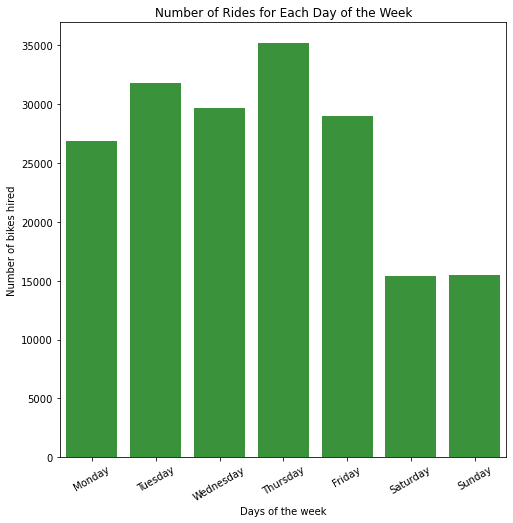

In [7]:
plt.figure(figsize = [8, 8])
default_color = sb.color_palette()[2]
order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
sb.countplot(data=bike_df_clean, x='day_hired', color=default_color, order=order);
plt.xticks(rotation=30);
plt.xlabel("Days of the week");
plt.ylabel("Number of bikes hired");
plt.title("Number of Rides for Each Day of the Week");

## (Visualization 2)
> The purpose of this visualization is to look at the changes in the number of rides over the hours of the day.

> The greater number of rides occured during 8:00am and 5:00pm respectively. This is quite expected due to most people commuting to school or their work places around 8:00am and the rush back home around 5:00pm. We observe almost the same number of rides between 10:00am and 3:00pm. In the evening the number of rides reduces and at dawn, rides are almost not in existence. 

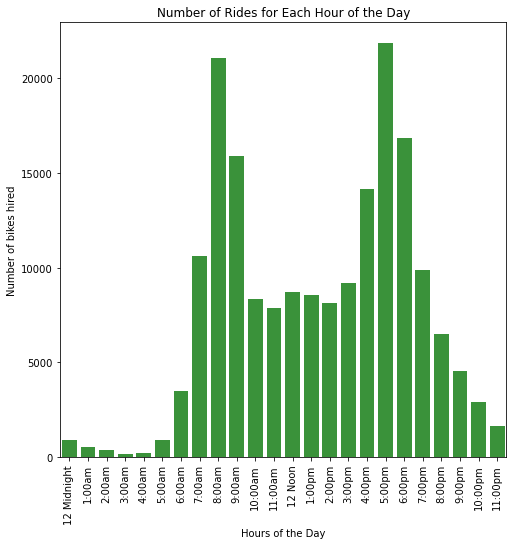

In [8]:
plt.figure(figsize = [8, 8])
default_color = sb.color_palette()[2]

sb.countplot(data=bike_df_clean, x='start_time_hr', color=default_color);
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], ["12 Midnight","1:00am","2:00am","3:00am","4:00am","5:00am",
                                                                             "6:00am","7:00am","8:00am","9:00am","10:00am","11:00am","12 Noon",
                                                                             "1:00pm","2:00pm","3:00pm","4:00pm","5:00pm","6:00pm","7:00pm",
                                                                             "8:00pm","9:00pm","10:00pm","11:00pm"])
plt.xticks(rotation=90);

plt.xlabel("Hours of the Day");
plt.ylabel("Number of bikes hired");
plt.title("Number of Rides for Each Hour of the Day");

## (Visualization 3)

> The purpose of this visualization is to look at the average rides with respect to gender type.

> We observe here that across all the days of the week the gender other has a higher average duration of rides than both the male and the female genders.

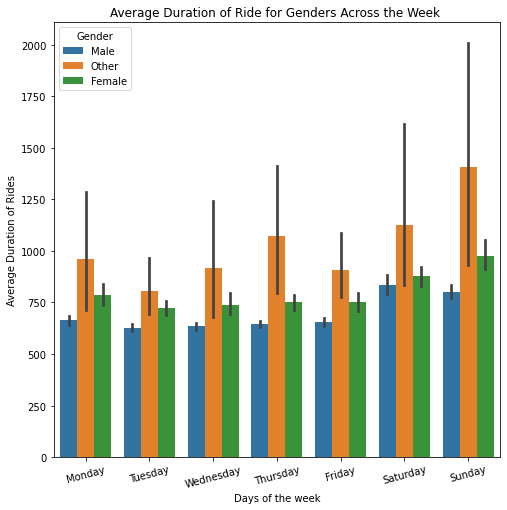

In [9]:
plt.figure(figsize = [8, 8])
order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
sb.barplot(data=bike_df_clean, x='day_hired', y='duration_sec',hue ='member_gender',order=order)
plt.xticks(rotation=15);
plt.xlabel("Days of the week");
plt.ylabel("Average Duration of Rides");
plt.title("Average Duration of Ride for Genders Across the Week ");
plt.legend(title='Gender');

## (Visualization 4)
> The purpose of this visualization is to look at the average rides with respect to user type.

> We observe here that across all the days of the week customers has a higher average duration of rides than subscribers.

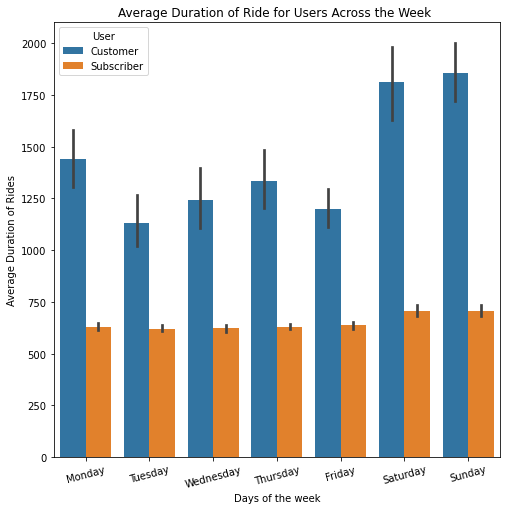

In [10]:
plt.figure(figsize = [8, 8])
order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
sb.barplot(data=bike_df_clean, x='day_hired', y='duration_sec',hue ='user_type',order=order)
plt.xticks(rotation=15);
plt.xlabel("Days of the week");
plt.ylabel("Average Duration of Rides");
plt.title("Average Duration of Ride for Users Across the Week ");
plt.legend(title='User');

In [ ]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt